# **CHAPTER 5. All New Functional Annotation**

Import all the needed for analysis modules

In [1]:
import pandas as pd
from kegganog import boxplot as keggabox
from kegganog import grouped_heatmap_multi
import seaborn as sns
import matplotlib.pyplot as plt

Make a directory to store the data

In [ ]:
! mkdir data/

Download all the `uncharacterized proteins` for `Pseudogymnoascus destructans` - there are 16.425 of them in NCBI RefSeq

In [ ]:
! esearch -db nucleotide \
    -query '"Pseudogymnoascus destructans" AND Fungi AND "uncharacterized" AND srcdb_refseq[PROP]' \
    | efetch -format fasta > data/uncharacterized.fasta

Download all the `characterized proteins` for `Pseudogymnoascus destructans` - there are 3.909 of them in NCBI RefSeq

In [ ]:
! esearch -db nucleotide \
    -query '"Pseudogymnoascus destructans" AND Fungi NOT "uncharacterized" AND srcdb_refseq[PROP]' \
    | efetch -format fasta > data/characterized.fasta

Combine all the proteins for `Pseudogymnoascus destructans` in one complete `.fasta` file

In [ ]:
! cat data/*.fasta > data/complete.fasta

Run `eggNOG-mapper` on all 3 `.fasta` files

In [ ]:
! snakemake -s emapp_pipeline --cores all

Run a `KEGGaNOG` to investigate the pathways of _Pseudogymnoascus destructans_

Check the version of `KEGGaNOG`

In [2]:
! KEGGaNOG -V

KEGGaNOG by Ilia V. Popov
KEGGaNOG 0.7.42


Create a directory to store all the `KEGGaNOG` data

In [1]:
! mkdir KEGGaNOG_data/

## **Part 1. Complete functional profile**

Run `KEGGaNOG` in single mode on complete profile only

In [ ]:
! KEGGaNOG -i eggNOG/complete/complete.emapper.annotations -o KEGGaNOG_data/Pd -c Greens -g -n '$\it{P. desctructans}$' -dpi 600

KEGGaNOG by Ilia V. Popov
Saving plot: 100%|████████████████████████████████| 1/1 [00:05<00:00,  5.46s/it]
Figure(2800x2000)
Creating heatmap parts: 100%|█████████████████████| 3/3 [00:06<00:00,  2.09s/it]
Heatmap saved in KEGGaNOG_data/Pd/heatmap_figure.png


In [2]:
! mkdir imgs/

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
/var/folders/kn/dm4gk8l50h9ccw7mv7pwj2dc0000gn/T/ipykernel_92920/1394151009.py:2: SyntaxWarning: invalid escape sequence '\i'
  file_path = "KEGGaNOG_data/Pd/$\it{P. desctructans}$_pathways.tsv"  # Update with your file path
/var/folders/kn/dm4gk8l50h9ccw7mv7pwj2dc0000gn/T/ipykernel_92920/1394151009.py:25: UserWarning: The palette list has more values (22) than needed (16), which may not be intended.
  sns.barplot(data=pd_df_melted, x="Score", y="Pathway", hue="Score", palette=palette, dodge=False, legend=False)


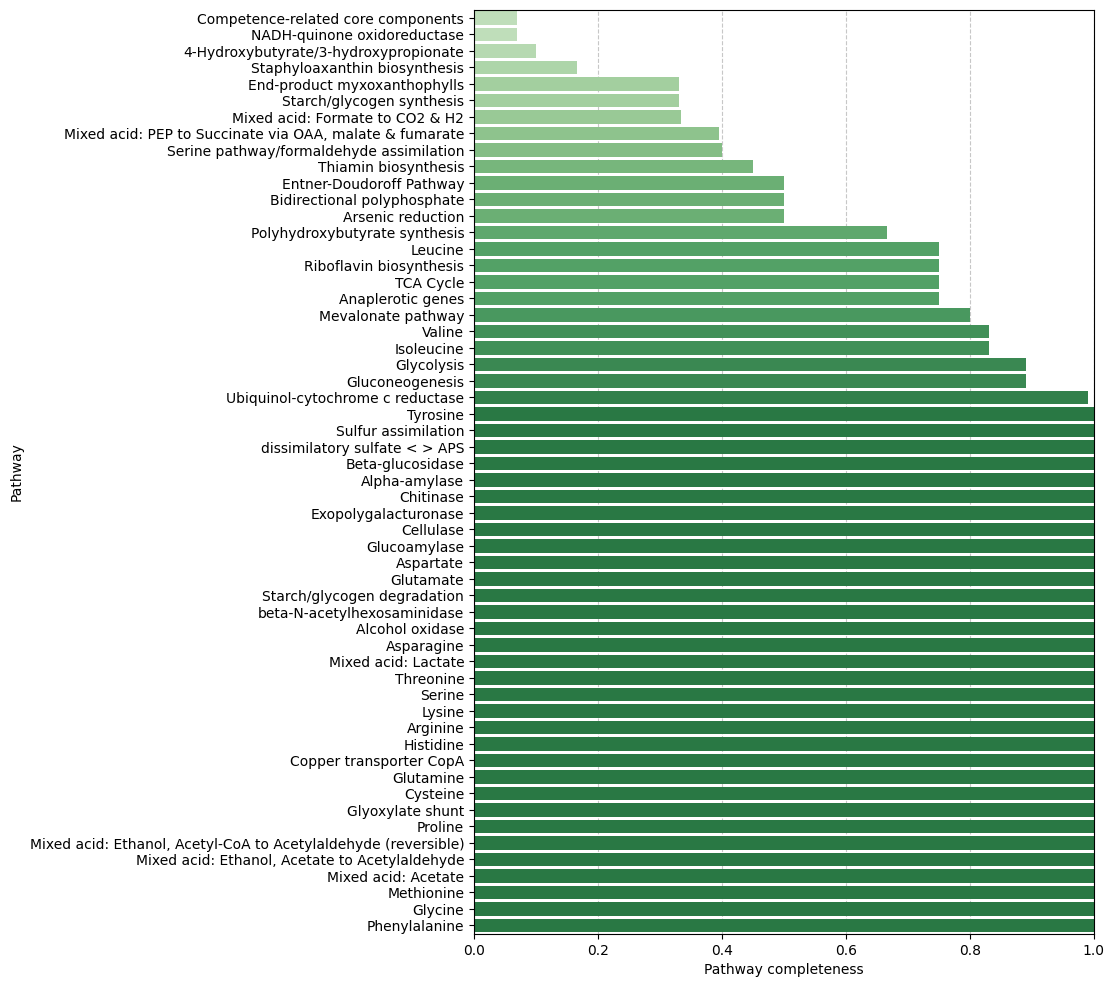

In [32]:
# Load the data
file_path = "KEGGaNOG_data/Pd/$\it{P. desctructans}$_pathways.tsv"  # Update with your file path
pd_df = pd.read_csv(file_path, sep="\t")

# Drop the "Function" column since it's not needed
pd_df_filtered = pd_df.drop(columns=["Function"])

# Keep only pathways with values greater than 0
pd_df_nonzero = pd_df_filtered.loc[:, (pd_df_filtered > 0).any(axis=0)]

# Reshape data into long format
pd_df_melted = pd_df_nonzero.melt(var_name="Pathway", value_name="Score")

# Sort by score for better visualization
pd_df_melted = pd_df_melted.sort_values(by="Score", ascending=False).reset_index(drop=True)

# Convert to sentence case if in lowercase
pd_df_melted['Pathway'] = pd_df_melted['Pathway'].apply(lambda x: x.capitalize() if x.islower() else x)

plt.figure(figsize=(8, 12))

# Generate more colors than needed, then take only the darker ones
palette = sns.color_palette("Greens", n_colors=30)[8:]  # Skip the first 5 bright colors

sns.barplot(data=pd_df_melted, x="Score", y="Pathway", hue="Score", palette=palette, dodge=False, legend=False)

plt.xlabel("Pathway completeness")
plt.ylabel("Pathway")
plt.gca().invert_yaxis()

# Add grid lines below the barplot
plt.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)

# Limit the frame border to 1.0 on the x-axis
plt.xlim(0, 1.0)

# Ensure bars are drawn on top by setting zorder higher than grid
plt.gca().set_axisbelow(True)

plt.savefig("imgs/barplot.png", dpi=600, bbox_inches="tight")
plt.show()

## **Part 2. Comparison of characterized and completed profiles**

Create an input file for `KEGGaNOG`

In [2]:
! ls eggNOG/*/*.annotations > KEGGaNOG_data/KEGGaNOG_input.txt

Run `KEGGaNOG` in multi mode on all the 3 profiles!

In [6]:
! KEGGaNOG -M -i KEGGaNOG_data/KEGGaNOG_input.txt -o KEGGaNOG_data/comparison -c Greens -g -dpi 600

KEGGaNOG by Ilia V. Popov
Parsing eggNOG/characterized/characterized.emapper.annotations...
Reading characterized: 100%|██████████████████████| 1/1 [00:00<00:00, 19.01it/s]
Formatting characterized: 2it [00:00, 334.85it/s]                               
Running KEGG-Decoder on characterized...
Executing KEGG-Decoder: 100%|█████████████████████| 1/1 [00:00<00:00,  1.64it/s]
Parsing eggNOG/uncharacterized/uncharacterized.emapper.annotations...
Reading uncharacterized: 100%|████████████████████| 1/1 [00:00<00:00,  2.71it/s]
Formatting uncharacterized: 2it [00:00, 79.03it/s]                              
Running KEGG-Decoder on uncharacterized...
Executing KEGG-Decoder: 100%|█████████████████████| 1/1 [00:00<00:00,  1.39it/s]
Parsing eggNOG/complete/complete.emapper.annotations...
Reading complete: 100%|███████████████████████████| 1/1 [00:00<00:00,  2.44it/s]
Formatting complete: 2it [00:00, 74.74it/s]                                     
Running KEGG-Decoder on complete...
Executing KEGG

Reorder columns in `KEGGaNOG`'s `merged_pathways.tsv` dataframe

In [4]:
# Load your dataset
multi_df = pd.read_csv("KEGGaNOG_data/comparison/merged_pathways.tsv", sep="\t")

Check the current columns order

In [5]:
multi_df.head(5)

,Function,complete,characterized,uncharacterized
0,3-Hydroxypropionate Bicycle,0.00,0.00,0.00
1,4-Hydroxybutyrate/3-hydroxypropionate,0.10,0.10,0.10
2,Adhesion,0.00,0.00,0.00
3,Anaplerotic genes,0.75,0.50,0.75
4,Arsenic reduction,0.50,0.25,0.50


Total mess! Let's reorder it

In [6]:
multi_df = multi_df[['Function', 'characterized', 'uncharacterized', 'complete']]

And check how it is now

In [7]:
multi_df.head(2)

,Function,characterized,uncharacterized,complete
0,3-Hydroxypropionate Bicycle,0.0,0.0,0.0
1,4-Hydroxybutyrate/3-hydroxypropionate,0.1,0.1,0.1


Seems like we characterized a lot of new pathways!

Finally, let's reorder column in multi heatmap

Create a directory to store reordered heatmap

In [18]:
! mkdir KEGGaNOG_data/comparison/reord_heatmap/

Run `KEGGaNOG` multi heatmap function on reordered df!

Creating heatmap parts: 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]
/Volumes/SAMSUNG_SSD/Documents/miniconda3/conda_envs/kegganog/lib/python3.12/site-packages/kegganog/grouped_heatmap_multi.py:231: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])
Saving plot: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


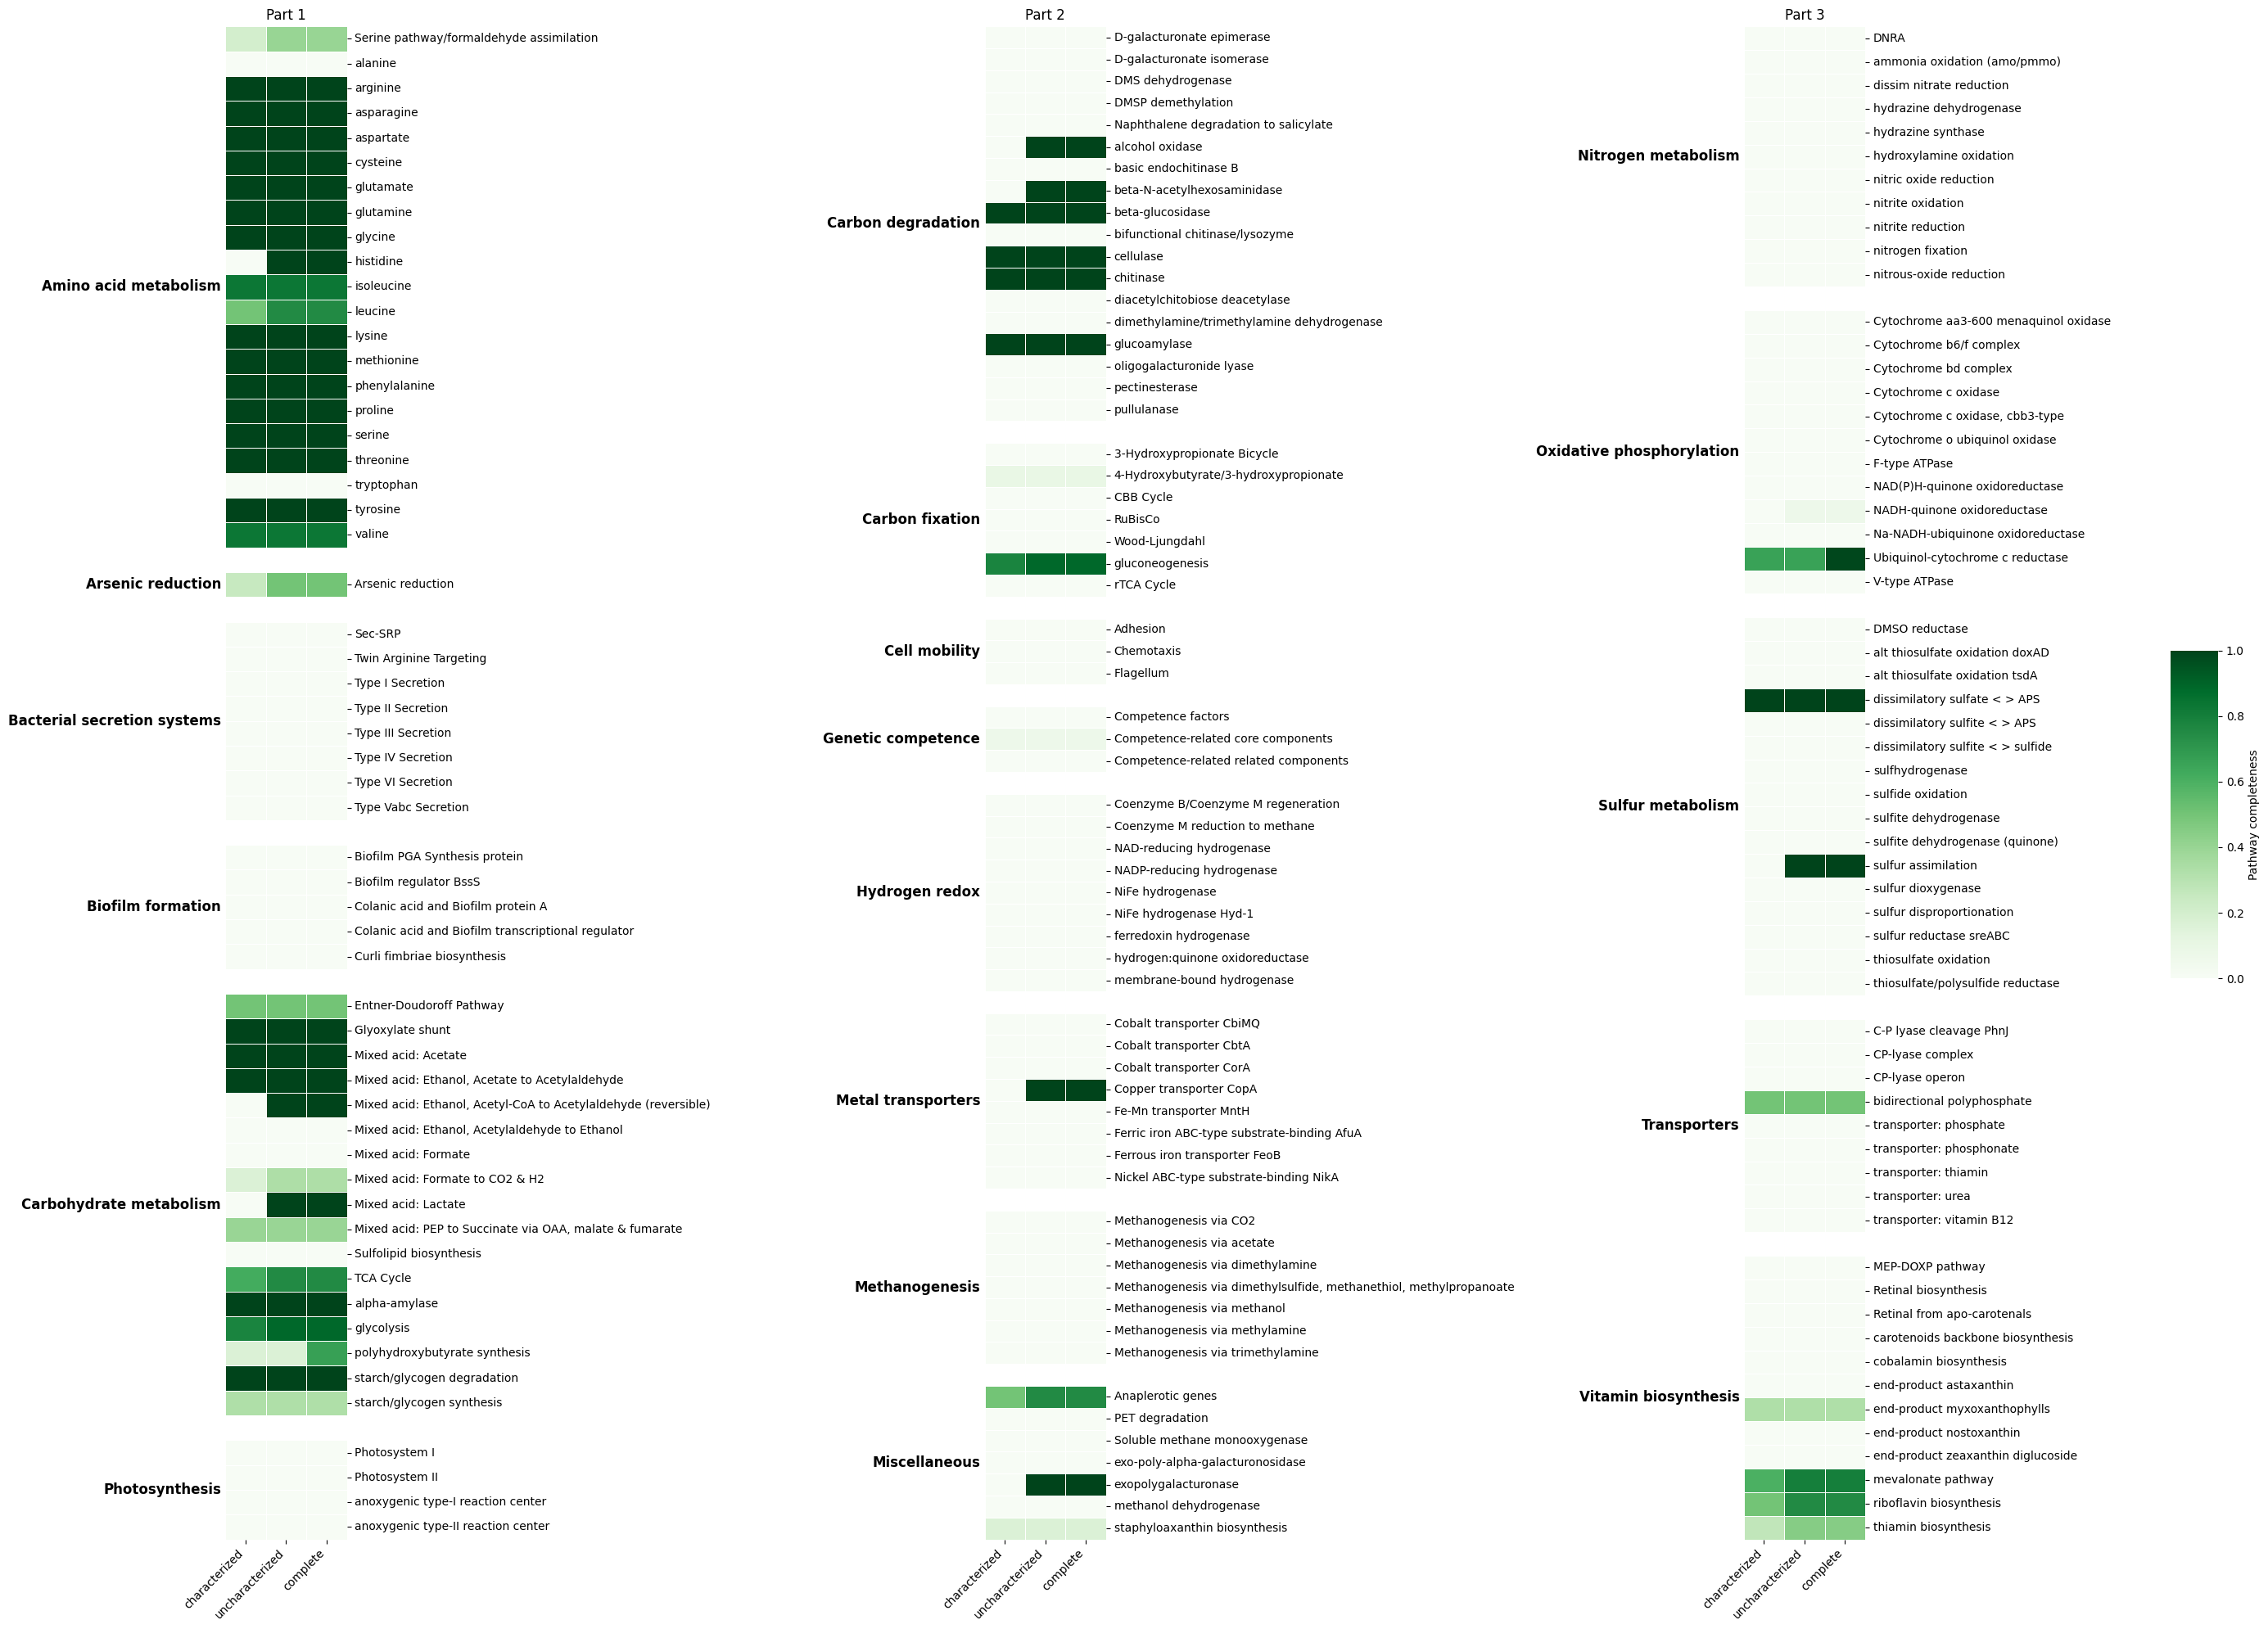

In [ ]:
grouped_heatmap_multi.generate_grouped_heatmap_multi(multi_df, "KEGGaNOG_data/comparison/reord_heatmap", 600, "Greens")

Well, that's good. But, let's create a heatmap of only "completed" pathways!

/var/folders/kn/dm4gk8l50h9ccw7mv7pwj2dc0000gn/T/ipykernel_91190/47180522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_df_completed['Function'] = multi_df_completed['Function'].apply(lambda x: x.capitalize() if x.islower() else x)


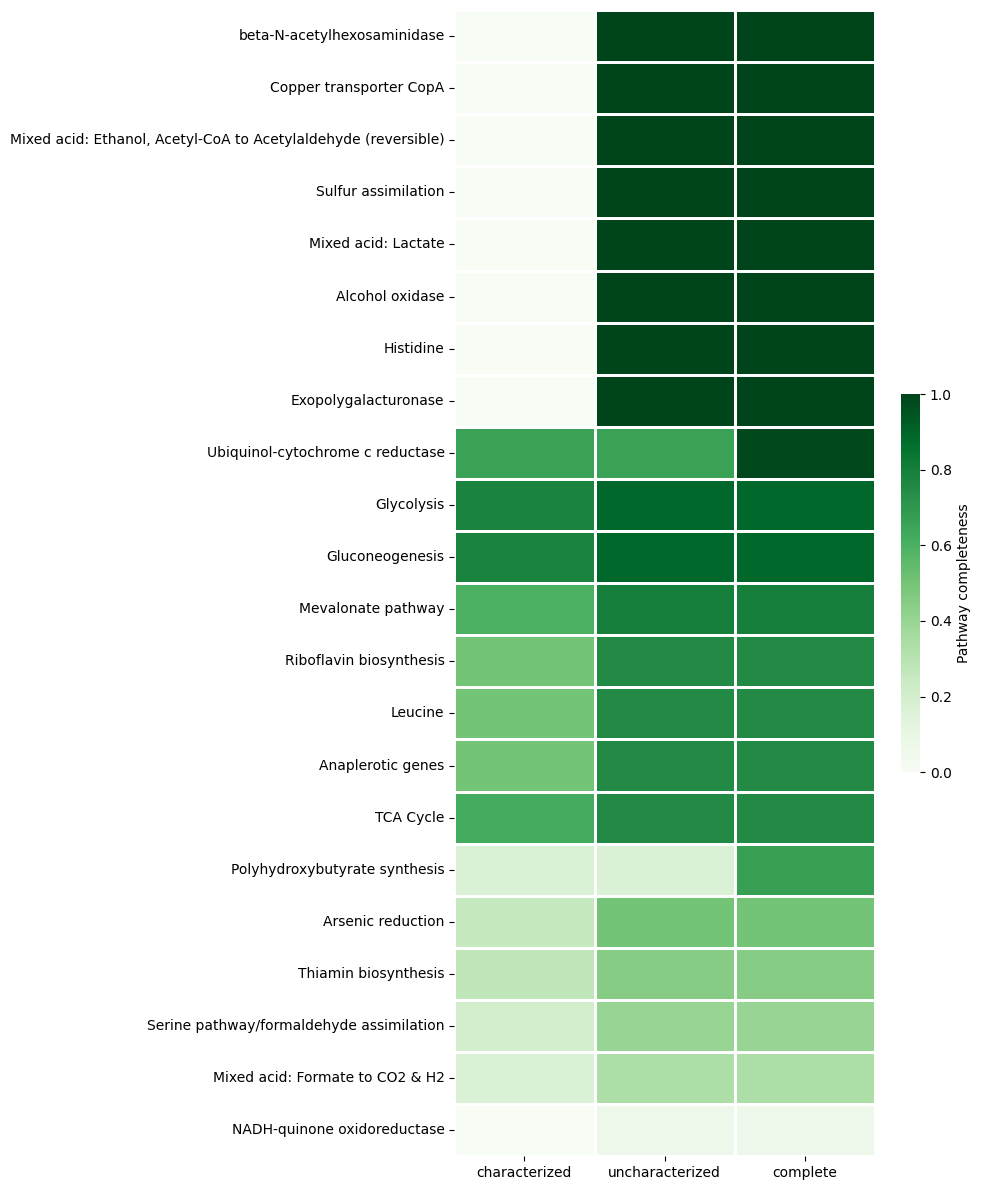

In [8]:
multi_df_completed = multi_df[multi_df["complete"] > multi_df["characterized"]]
multi_df_completed['Function'] = multi_df_completed['Function'].apply(lambda x: x.capitalize() if x.islower() else x)

plt.figure(figsize=(10, 12))

# Reorder the rows based on the maximum value of each row
df_sorted = multi_df_completed.set_index("Function")
df_sorted = df_sorted.loc[df_sorted.max(axis=1).sort_values(ascending=False).index]

ax = sns.heatmap(
    df_sorted,
    cmap="Greens",
    annot=False,
    linewidths=2,
    cbar=True,  # Enable colorbar
    cbar_kws={"label": "Pathway completeness", "shrink": 0.33},
)

plt.xticks(rotation=0)
plt.ylabel("")
plt.tight_layout()

plt.savefig("imgs/heatmap.png", dpi=600, bbox_inches="tight")
plt.show()

Perfect! Now let's use `KEGGaNOG`'s boxplot API to compare 3 profiles in boxplots!

Boxplot saved as imgs/boxplot.png


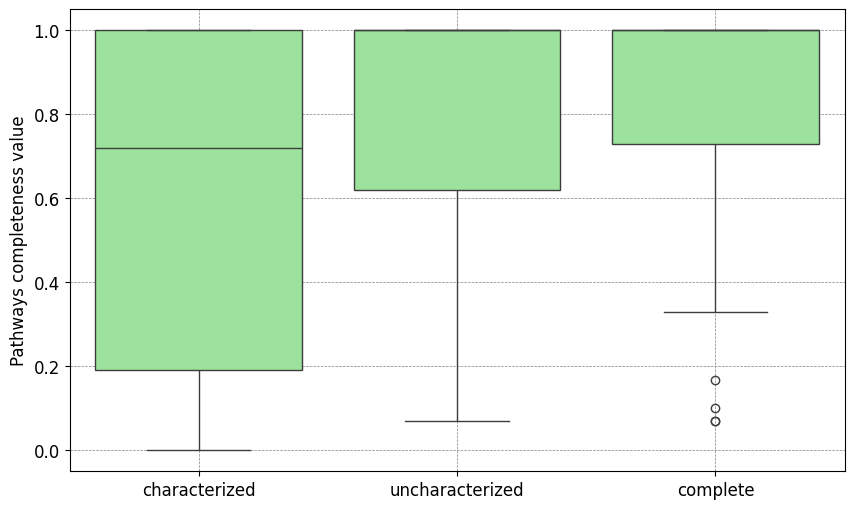

In [9]:
multi_df_nonzero = multi_df[(multi_df["characterized"] > 0) | (multi_df["uncharacterized"] > 0) | (multi_df["complete"] > 0)]

# Generate a fully customized boxplot
keggabox(
    multi_df_nonzero,
    color="#90ee90",
    title="", title_fontsize = 12, title_weight = "normal",
    xlabel="",
    xticks_rotation = 0,
    ylabel="Pathways completeness value", ylabel_fontsize = 12, ylabel_weight = "normal",
    figsize=(10, 6),
    save_path="imgs/boxplot.png",
    save_format="png",
    save_dpi=600
)

That's literally all!